In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# This project implements an algorithmic trading strategy using historical S&P 500 data.
# The strategy is based on the concept of moving averages and aims to identify potential buy and sell signals.

sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-26 00:00:00-05:00,5970.870117,6009.819824,5932.689941,5956.060059,4869580000,0.0,0.0
2025-02-27 00:00:00-05:00,5981.879883,5993.689941,5858.779785,5861.569824,5057680000,0.0,0.0
2025-02-28 00:00:00-05:00,5856.740234,5959.399902,5837.660156,5954.500000,6441140000,0.0,0.0


<Axes: title={'center': 'S&P 500'}, xlabel='Date'>

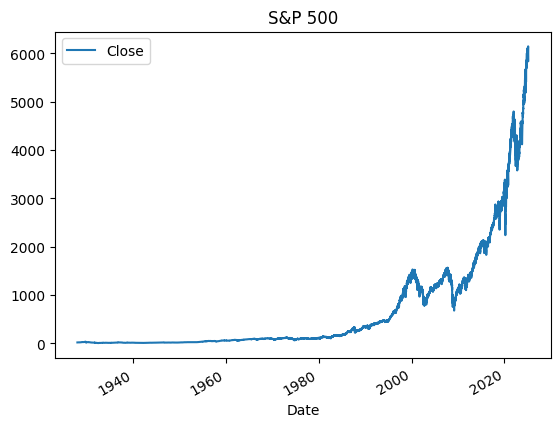

In [16]:
sp500.plot(y='Close', title='S&P 500',use_index=True)

In [44]:
#del sp500['Dividends']
#del sp500['Stock Splits']
sp500['Tommorow'] = sp500['Close'].shift(-1)
sp500['Target'] = (sp500['Tommorow'] > sp500['Close']).astype(int)
sp500 = sp500.loc['1990-01-01':].copy()
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tommorow,Target
Date,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,0.0,0.0,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,0.0,0.0,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,0.0,0.0,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,0.0,0.0,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,0.0,0.0,349.619995,0
...,...,...,...,...,...,...,...,...,...
2025-02-26 00:00:00-05:00,5970.870117,6009.819824,5932.689941,5956.060059,4869580000,0.0,0.0,5861.569824,0
2025-02-27 00:00:00-05:00,5981.879883,5993.689941,5858.779785,5861.569824,5057680000,0.0,0.0,5954.500000,1
2025-02-28 00:00:00-05:00,5856.740234,5959.399902,5837.660156,5954.500000,6441140000,0.0,0.0,5849.720215,0


In [46]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100,random_state=1)
train  = sp500.iloc[:-100].copy()
test = sp500.iloc[-100:].copy()

predictors = ['Open', 'High', 'Low', 'Close', 'Volume']
model.fit(train[predictors], train['Target'])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [47]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test['Target'], preds)

0.5882352941176471

<Axes: xlabel='Date'>

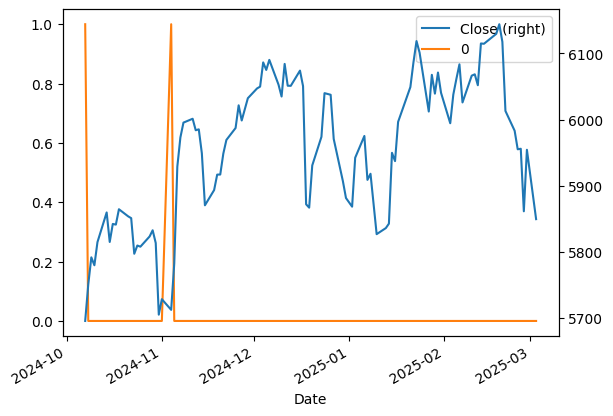

In [20]:
combined = pd.concat([test['Close'], preds,], axis=1)
combined.plot(secondary_y='Close')

In [48]:
def predict(train,test,predictors,model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index,name='Predicted')
    combined = pd.concat([test['Target'], preds,], axis=1)
    return combined

In [49]:
def backtest(data, model, predictors, start=2500,step=250):
    all_preds = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:i+step].copy()
        preds = predict(train,test,predictors,model)
        all_preds.append(preds)

    return pd.concat(all_preds)

In [23]:
predictions = backtest(sp500, model, predictors)
predictions['Predicted'].value_counts()

Predicted
0    3727
1    2630
Name: count, dtype: int64

In [50]:
precision_score(predictions['Target'], predictions['Predicted'])

0.5447941888619855

In [25]:
predictions['Target'].value_counts() / predictions.shape[0]

Target
1    0.535945
0    0.464055
Name: count, dtype: float64

In [51]:
horzions = [2,5,60,250,1000]

new_predictors = []

for horizon in horzions:
    rolling_avg = sp500.rolling(window=horizon).mean()
    ratio_column = f'Close_{horizon}_Ratio'
    sp500[ratio_column] = sp500['Close'] / rolling_avg['Close']
    trend_column = f'Trend_{horizon}'
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

def calculate_roc(data,period = 14):
    return ((data-data.shift(period))/data.shift(period))*100

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal
sp500['MACD'], sp500['MACD_Signal'] = calculate_macd(sp500['Close'])
sp500['MACD_Cross'] = np.where(sp500['MACD'] > sp500['MACD_Signal'], 1, 0)  
sp500['MACD_Cross_Signal'] = sp500['MACD_Cross'].diff()  
sp500['ROC'] = calculate_roc(sp500['Close'])
new_predictors+= ['MACD', 'MACD_Signal', 'ROC','MACD_Cross','MACD_Cross_Signal']
sp500=sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tommorow,Target,Close_2_Ratio,...,Trend_60,Close_250_Ratio,Trend_250,Close_1000_Ratio,Trend_1000,MACD,MACD_Signal,MACD_Cross,MACD_Cross_Signal,ROC
Date,,,,,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,0.0,0.0,461.839996,0,0.997157,...,32.0,1.028047,127.0,1.176082,512.0,0.437440,0.373367,1,0.0,0.440318
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,0.0,0.0,463.339996,1,0.998681,...,32.0,1.025151,126.0,1.172676,512.0,0.213977,0.341489,0,-1.0,-0.112464
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,0.0,0.0,466.380005,1,1.001621,...,32.0,1.028274,127.0,1.176163,513.0,0.156119,0.304415,0,0.0,0.060467
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,0.0,0.0,465.850006,0,1.003270,...,32.0,1.034781,128.0,1.183537,514.0,0.351517,0.313835,1,1.0,0.969909
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,0.0,0.0,465.299988,0,0.999431,...,32.0,1.033359,128.0,1.181856,513.0,0.458322,0.342733,1,0.0,0.879187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-25 00:00:00-05:00,5982.729980,5992.649902,5908.490234,5955.250000,5374690000,0.0,0.0,5956.060059,1,0.997655,...,31.0,1.064518,141.0,1.293618,529.0,6.832571,22.724929,0,0.0,-1.368525
2025-02-26 00:00:00-05:00,5970.870117,6009.819824,5932.689941,5956.060059,4869580000,0.0,0.0,5861.569824,0,1.000068,...,31.0,1.063995,141.0,1.293179,530.0,-0.984731,17.982997,0,0.0,-1.739178
2025-02-27 00:00:00-05:00,5981.879883,5993.689941,5858.779785,5861.569824,5057680000,0.0,0.0,5954.500000,1,0.992004,...,31.0,1.046523,141.0,1.272105,529.0,-14.635859,11.459226,0,0.0,-3.649173


In [52]:
model = RandomForestClassifier(n_estimators=300, min_samples_split=40,random_state=1)
def predict(train,test,predictors,model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds>=.6]=1
    preds[preds<.6]=0
    preds = pd.Series(preds, index=test.index,name='Predicted')
    combined = pd.concat([test['Target'], preds,], axis=1)
    return combined


In [53]:
new_predictors+=[ 'Close','Volume']

In [54]:

predictions = backtest(sp500, model, new_predictors)

In [55]:
predictions['Predicted'].value_counts()

Predicted
0.0    4971
1.0     386
Name: count, dtype: int64

In [56]:
precision_score(predictions['Target'], predictions['Predicted'])

0.5751295336787565

57,5 % is not bad. Future improvements could include incorporating sentiment analysis to account for non-technical factors.